# Simulation Test

## Introduction

In [1]:
import sys
import random
import configparser
import numpy as np
import pylab
from scipy import stats

In [14]:
sys.path.append('../src')
sys.path.append('../src/simulation')
sys.path.append('../src/analysis')


In [15]:
from environment import Environment
from predator import Predator

from simutil import get_params, runsim
#from analysis import analyse_results
import analysis.analysis as an


In [16]:
params = get_params("../experiments/ER0_1.ini")

results = runsim(params)

Slope, intercept: 0.00022235584852399744 3.449855997616352e-05
R-squared: 0.01434830123070426
Residual Std Error =  0.26783814391246724


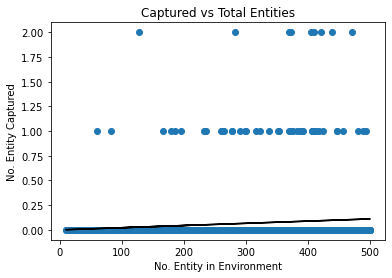

In [17]:
data = an.extract_data(results)
an.analyse_results(data)